<a href="https://colab.research.google.com/github/Nlamje45/AI-Projects/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
d=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx")
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
d.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Dropping Null values present in the dataset

In [ ]:
d.dropna(inplace=True)

In [ ]:
d.shape

(406829, 8)

It is mentioned in the problem statement that column InvoiceNo which starts with 'c' indicates cancellation which is redundant data so we must drop this data.

In [ ]:
d['InvoiceNo']=d['InvoiceNo'].astype('str')

In [ ]:
d[d['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
d=d[~d['InvoiceNo'].str.contains("C")]

In [ ]:
d.shape

(397924, 8)

In [ ]:
d.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


**Exploratory Data Analysis**

In [ ]:
disdat=d['Description'].value_counts().reset_index()
disdat.rename(columns={'index':'Item_Name'},inplace=True)
disdat.rename(columns={'Description':'Count'},inplace=True)
disdat.head()

,Item_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
disdat.tail()

,Item_Name,Count
3872,SET 36 COLOURING PENCILS DOILEY,1
3873,PURPLE ENAMEL FLOWER HAIR TIE,1
3874,ORANGE FLOWER MUG,1
3875,FIRE POLISHED GLASS BRACELET RED,1
3876,POTTING SHED SOW 'N' GROW SET,1


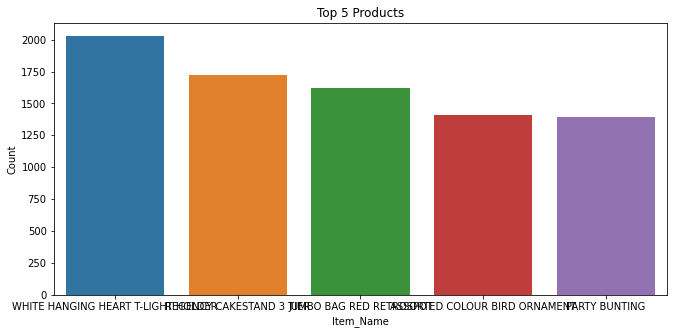

In [ ]:
plt.figure(figsize=(11,5))
plt.title('Top 5 Products')
sns.barplot(x='Item_Name',y='Count',data=disdat[:5])

In [ ]:
d.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS      54415
JUMBO BAG RED RETROSPOT                46181
WHITE HANGING HEART T-LIGHT HOLDER     36725
                                       ...  
SET/3 TALL GLASS CANDLE HOLDER PINK        1
LASER CUT MULTI STRAND NECKLACE            1
CRACKED GLAZE EARRINGS BROWN               1
DOLPHIN WINDMILL                           1
SET OF 3 PINK FLYING DUCKS                 1
Name: Quantity, Length: 3877, dtype: int64

In [ ]:
d.groupby('Description')['StockCode'].nunique()

Description
 4 PURPLE FLOCK DINNER CANDLES      1
 50'S CHRISTMAS GIFT BAG LARGE      1
 DOLLY GIRL BEAKER                  1
 I LOVE LONDON MINI BACKPACK        1
 I LOVE LONDON MINI RUCKSACK        1
                                   ..
ZINC T-LIGHT HOLDER STARS SMALL     1
ZINC TOP  2 DOOR WOODEN SHELF       1
ZINC WILLIE WINKIE  CANDLE STICK    1
ZINC WIRE KITCHEN ORGANISER         1
ZINC WIRE SWEETHEART LETTER TRAY    1
Name: StockCode, Length: 3877, dtype: int64

In [ ]:
condat=d['Country'].value_counts().reset_index()
condat.rename(columns={'index':'Countries'},inplace=True)
condat.rename(columns={'Country':'Count'},inplace=True)
print(condat.head())
print("--"*30)
print(condat.tail())

        Countries   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485
------------------------------------------------------------
         Countries  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9


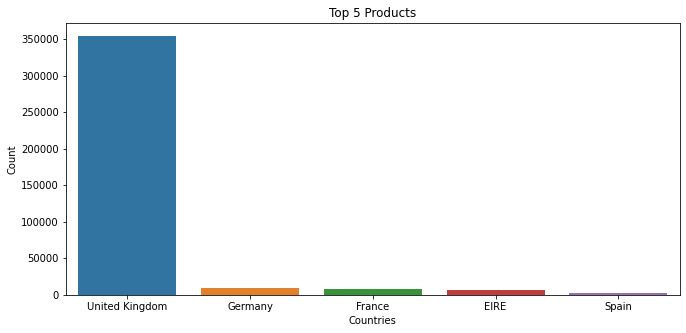

In [ ]:
plt.figure(figsize=(11,5))
plt.title('Top 5 Products')
sns.barplot(x='Countries',y='Count',data=condat[:5])

The Customers are mostly from United Kingdom

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


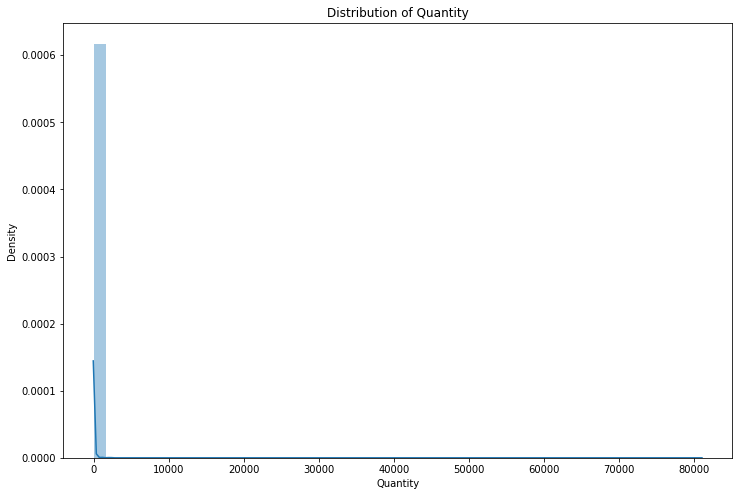

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Quantity')
sns.distplot(d['Quantity'])

Using Log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


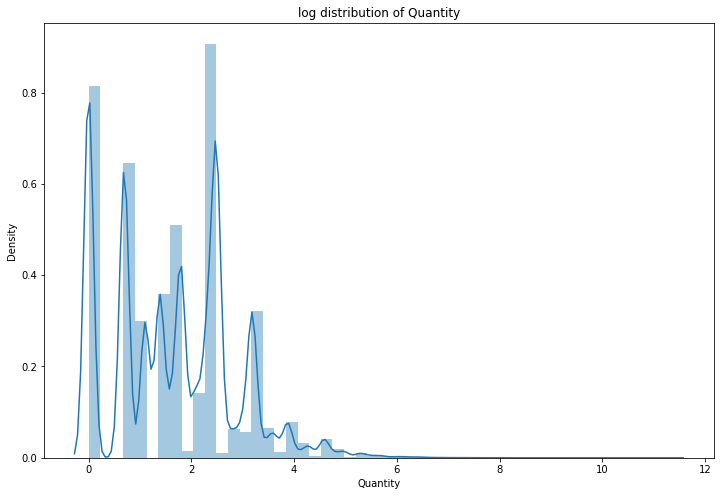

In [ ]:
plt.figure(figsize=(12,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(d['Quantity']))

Distribution for Unit price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


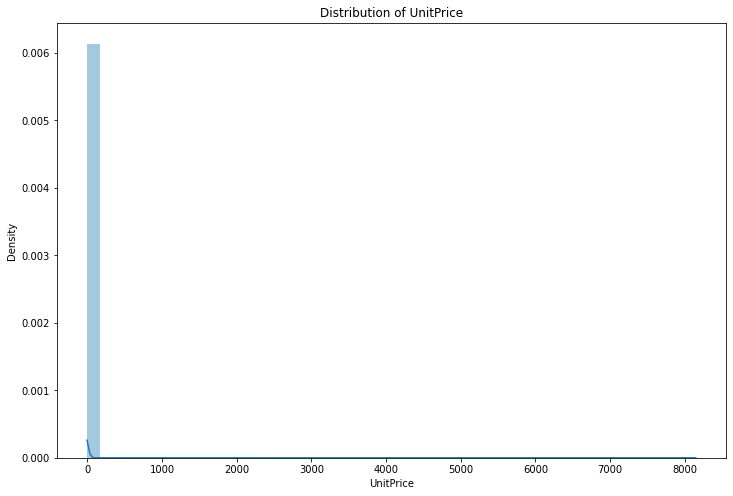

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of UnitPrice')
sns.distplot(d['UnitPrice'])

**Feature Engineering**

In [ ]:
d["InvoiceDate"] = pd.to_datetime(d["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
d['Day']=d['InvoiceDate'].dt.day_name()
d["year"] = d["InvoiceDate"].apply(lambda x: x.year)
d["month_num"] = d["InvoiceDate"].apply(lambda x: x.month)
d["day_num"] = d["InvoiceDate"].apply(lambda x: x.day)
d['Month']=d['InvoiceDate'].dt.month_name()
d["hour"] = d["InvoiceDate"].apply(lambda x: x.hour)
d["minute"] = d["InvoiceDate"].apply(lambda x: x.minute)

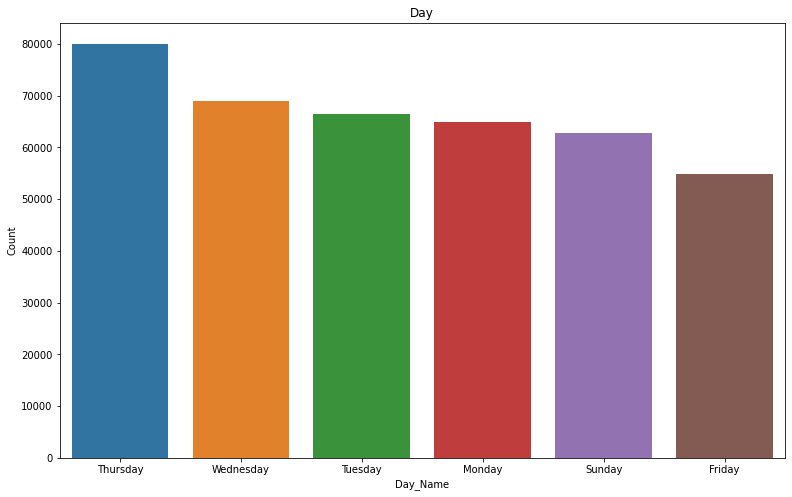

In [ ]:
dayd=d['Day'].value_counts().reset_index()
dayd.rename(columns={'index': 'Day_Name'}, inplace=True)
dayd.rename(columns={'Day': 'Count'}, inplace=True)
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=dayd)


It is clear that most Sales are on Thrusday>Wednesday>Tuesday respectively

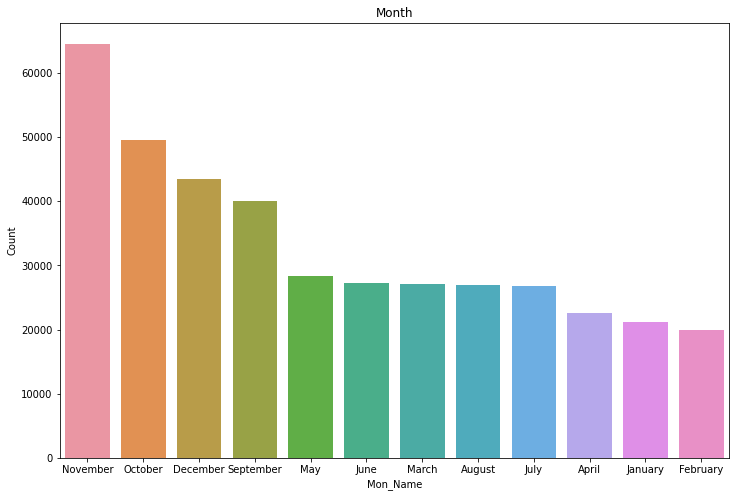

In [ ]:
mond=d['Month'].value_counts().reset_index()
mond.rename(columns={'index': 'Mon_Name'}, inplace=True)
mond.rename(columns={'Month': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Month')
sns.barplot(x='Mon_Name',y='Count',data=mond)


It is clear that most of the sales are in Year end November> October> December

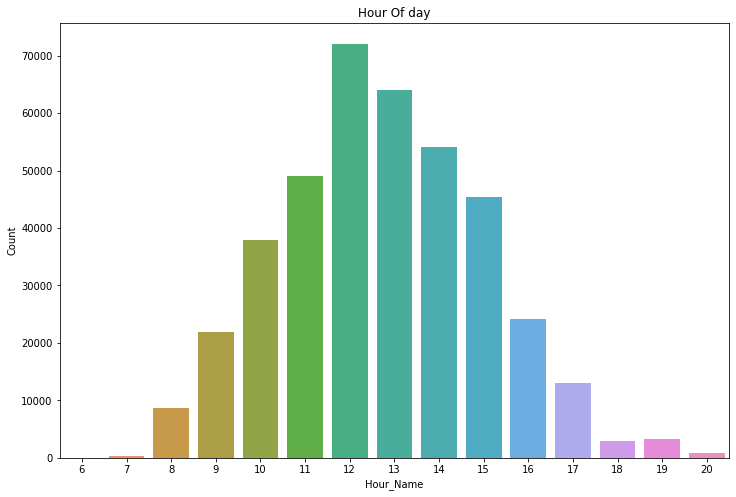

In [ ]:
hord=d['hour'].value_counts().reset_index()
hord.rename(columns={'index': 'Hour_Name'}, inplace=True)
hord.rename(columns={'hour': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Hour Of day')
sns.barplot(x='Hour_Name',y='Count',data=hord)


It is clear that most of the sales are in time between 10am to 4pm